In [1]:
import pycba as cba

In [2]:
spans = [4, 3, 9]
EI = [18e3, 120e3, 120e3]
supports = [-1, 0, 0, 0, -1, 0, -1, 0] # verti deflection, rotatin
loads = [
    [1, 1, 10, 0, 0], # beamnr, loadtype, force, start, stop
    [2, 1, 10, 0, 0],
    [3, 1, 10, 0, 0]
]
element_types = [2, 1, 1]

beam_model = cba.BeamAnalysis(spans, EI, supports, loads, element_types)
beam_model.analyze()

0

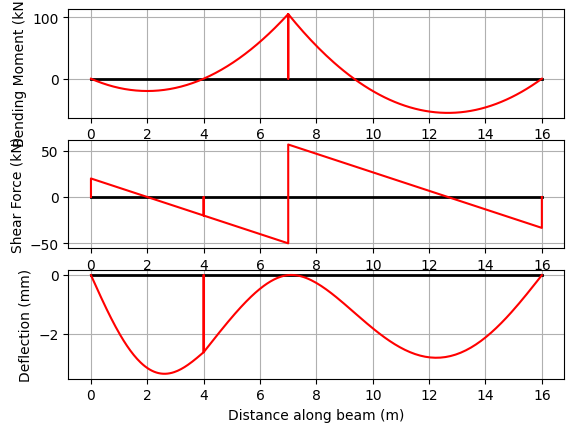

In [3]:
beam_model.plot_results()

In [4]:
axle_spacings = [4.3, 6.5]
axle_loads = [35, 145, 145]
aashto_truck = cba.Vehicle(axle_spacings=axle_spacings,  axle_weights=axle_loads)

In [5]:
bridge_model = cba.BridgeAnalysis(beam_model, aashto_truck)

309 <class 'numpy.ndarray'>


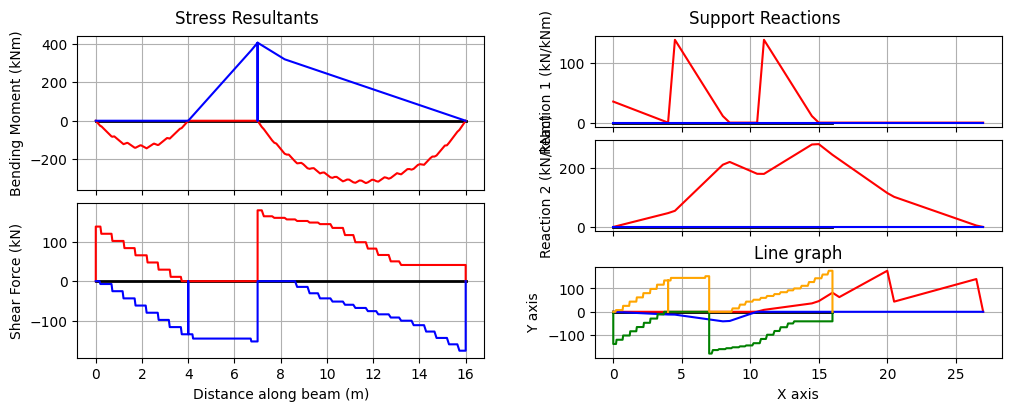

In [6]:
results_envelope = bridge_model.run_vehicle(step=0.5, plot_env=True)
Mmax = results_envelope.Mmax
Mmin = results_envelope.Mmin
Vmax = results_envelope.Vmax
Vmin = results_envelope.Vmin


pos_x = results_envelope.x

import matplotlib.pyplot as plt
print(len(Mmax), type(Mmax))


plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(pos_x, -Vmax, color ="green")
plt.plot(pos_x, -Vmin, color ="orange")
plt.show()

In [7]:
bridge_model.critical_values(results_envelope)

{'Mmax': {'val': 324.2199999999999, 'at': 11.68, 'pos': [22.5]},
 'Mmin': {'val': -405.9999999999999, 'at': 7.0, 'pos': [8.5, 15.0]},
 'Vmax': {'val': 178.83333333333337, 'at': 7.0, 'pos': [18.0]},
 'Vmin': {'val': -175.61111111111106, 'at': 15.73, 'pos': [20.0]},
 'nsup': 3,
 'Rmax0': {'val': 137.75, 'pos': 11.0},
 'Rmin0': {'val': 0.0, 'pos': 0.0},
 'Rmax1': {'val': 279.388888888889, 'pos': 15.0},
 'Rmin1': {'val': 0.0, 'pos': 0.0},
 'Rmax2': {'val': 175.61111111111103, 'pos': 20.0},
 'Rmin2': {'val': -40.819444444444386, 'pos': 8.0}}

In [8]:
# bridge_model.vResults[1].results.V
bridge_model.vResults[40].R

array([  0.        , 114.38888889, 175.61111111])